In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

Some Numpy practice
===

Make an array A of size 6 by 4 where every element is an integer of value 2

In [36]:
A = 2 * np.ones((6, 4))
print(A)


[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]


Make an array B of size 6 by 4 that has 3 on the leading diagonal and 1
everywhere else. 

In [37]:
B = 2* np.eye(6,4) + np.ones((6, 4))
print(B)


[[3. 1. 1. 1.]
 [1. 3. 1. 1.]
 [1. 1. 3. 1.]
 [1. 1. 1. 3.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Multiply these two matrices together. Why does A * B work, but
not np.dot(A,B)?

In [38]:
# print(A)
# print(B)
# print(A * B)
np.dot(A, B)
# As the error message shows, the shapes are wrong -- the second dim of matrix 1 needs to match the first of matrix 2

ValueError: shapes (6,4) and (6,4) not aligned: 4 (dim 1) != 6 (dim 0)

Explore the difference between np.dot(A.T,B) and np.dot(A,B.T). Why are
the results different shapes?

In [ ]:
# print(A)
# print(A.T) #transpose
# print(np.dot(A.T, B))
print(B)
print(B.T)
print(np.dot(A, B.T))

Arrange the integers between 3 and 29 into a 3D (3 by 3 by 3) array called C

In [ ]:
C = np.reshape(np.arange(3, 30), newshape=(3, 3, 3))
print(C)

+ Make a new C that is 4 by 4, with the first column being all of value 1, the next 2, the next 3, and the last one 4. 
+ Then extract the first and third rows. 
+ Matrix multiply them by the second and fourth columns.
+ And then find the places where that product is bigger than 20. 

In [ ]:
C = np.ones((4, 4))
C[:, 1] = 2
C[:, 2] = 3
C[:, 3] = 4
print(C)

print(C[[0, 2], :])     # rows 1 and 3

D = np.dot(C[[0, 2], :], C[:, [1, 3]])
print(D)

np.where(D>20)
print(D)

# Some Pandas practice

This dataset has the popularity of names over the past 60 or so years. If you open it in Excel you will see it is pretty messy. This first few lines below just load in the correct parts of the dataset. This kind of thing is quite common with real-world data.

In [ ]:
# This is nuisance stuff to read the correct columns
a = np.arange(2,196,3)
b = np.arange(3,196,3)
indices = np.zeros(int(196/3*2+1),dtype=int)
indices[0] = 1
indices[1::2] = a
indices[2::2] = b

#girls = pd.read_excel('/Users/marslast/Dropbox/Transfer/Teaching/DATA201/Datasets/Names.xlsx',sheet_name='Girls\' Names',skiprows=4,index_col=None,header=[0,1],usecols=list(indices), engine='openpyxl')
# girls = pd.read_excel('/Users/marslast/Dropbox/Transfer/Teaching/DATA201/Datasets/Names.xlsx',sheet_name='Girls\' Names',skiprows=4,index_col=None,usecols=list(indices), engine='openpyxl')
girls = pd.read_excel('../../res/data/Names.xlsx',sheet_name='Girls\' Names',skiprows=4,index_col=None,usecols=list(indices), engine='openpyxl')
girls = girls.loc[1:100]


Print out the first lines to make sure it makes sense

In [ ]:
girls.head()


Compute how many girls were given those top 100 names year by year

In [ ]:
for year in range(2, 131, 2): #from col 3 to end
    print(girls.columns[year-1], girls.iloc[:, year:year+1].sum())

We can't tell from that if a lot of girls were given these names or not. Let's get another dataset.

In [ ]:
total = pd.read_csv('../../res/data/BirthsNZ.csv',skiprows=[0,2])

Look at the head and tail of the dataset, and get rid of the pointless rows.

In [ ]:
total.head()


In [ ]:
total.tail()

In [ ]:
total = total[:28]

In [ ]:
# That's better!
total.tail()

Read off the totals, and print them out. There were a lot more babies!

In [ ]:
totals = total.iloc[:, [0, -1]]
print(totals)

Get some summary statistics.

In [ ]:
totals.describe()


The number of babies born varies quite a bit over the years, plot the totals by year to see that.

In [ ]:
pl.plot(totals.iloc[:,0], totals.iloc[:, 1])


Plot the number of girls with the top 100 names divided by the number of girls born (assuming it's half the total)

In [ ]:
# A bit of care needed to get the overlapping ones!
top100 = np.zeros(28)
count = 0
for year in range(76, 131, 2):
    top100[count] = girls.iloc[:, year:year+1].sum()
    count+=1

pl.plot(2*top100/totals.iloc[:,1])

Find the unique names in the list and count how often each one of those occurs. Some fun here with indices!

In [ ]:
popular = pd.unique(girls.iloc[:, 1::2].values.ravel())
print(popular)


In [ ]:
popcounts = np.zeros(len(popular))
count = 0
for i in popular:
    ind = np.where(girls==1)
    for j in range(len(ind[0])):
        popcounts[count] += girls.iloc[ind[0][j], ind[1][j]+1]
    count += 1

If your list of popular names is called popular, and the counts are called popcounts, you can use np.concatenate to put them together like this:

In [39]:
newdata = np.concatenate((np.reshape(popular,(len(popular),1)),np.reshape(popcounts,(len(popcounts),1))),axis=1)

Put that into a new dataframe, and track the popularity of the name 'Christine' over time, making a plot of it.

In [40]:
popularity = pd.DataFrame(data=newdata,index=None,columns=['Name','Count'])

In [41]:
ind = np.where(girls=="Christine")


0.5 Christine 779
1.5 Christine 689
2.5 Christine 754
3.5 Christine 773
4.5 Christine 609
5.5 Christine 656
6.5 Christine 675
7.5 Christine 614
8.5 Christine 547
9.5 Christine 497
10.5 Christine 376
11.5 Christine 354
12.5 Christine 338
14.5 Christine 324
13.5 Christine 314
15.5 Christine 260
16.5 Christine 230
17.5 Christine 207
18.5 Christine 191
19.5 Christine 161
22.5 Christine 117
20.5 Christine 131
21.5 Christine 110
25.5 Christine 88
23.5 Christine 87
24.5 Christine 73
32.5 Christine 73
30.5 Christine 71
26.5 Christine 66
31.5 Christine 60
34.5 Christine 62
33.5 Christine 59
27.5 Christine 56
38.5 Christine 54
37.5 Christine 52
44.5 Christine 45
29.5 Christine 52


Text(0.5, 1.0, 'Zoe')

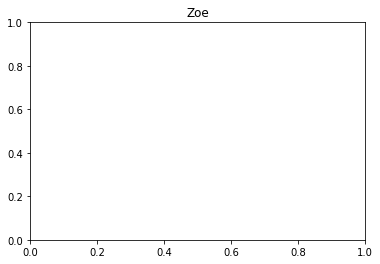

In [43]:
for i in range(len(ind[0])):
    print(ind[1][i]/2,girls.iloc[ind[0][i],ind[1][i]],girls.iloc[ind[0][i],ind[1][i]+1])

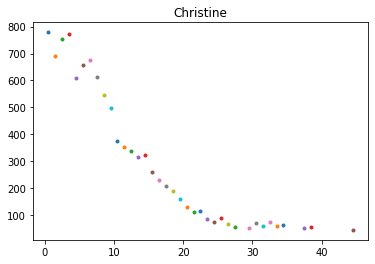

In [44]:
for i in range(len(ind[0])):
    pl.plot(ind[1][i]/2,girls.iloc[ind[0][i],ind[1][i]+1],'.')
pl.title('Christine');

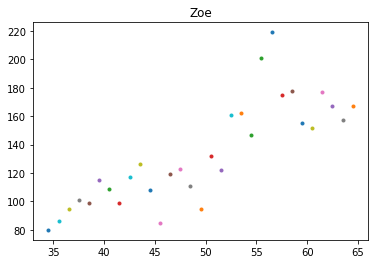

In [45]:
# Nothing special about Christine!
ind = np.where(girls=="Zoe")
for i in range(len(ind[0])):
    pl.plot(ind[1][i]/2,girls.iloc[ind[0][i],ind[1][i]+1],'.')
pl.title('Zoe');

Read off the most popular names, and store the values in a variable called 'names'.
We are going to see which are the common last letters for girl's names
ord gets the ascii code for the letter. We subtract 97 because 97 is the code for 'a':
char_as_int = lambda x: ord(x)-97

Write another lambda function to get the last letter. 

And write a loop to count how common each letter is, then plot it as a bar chart.

In [46]:
popularity.head()


,Name,Count
0,Christine,0.0
1,Susan,0.0
2,Karen,0.0
3,Michelle,0.0
4,Lisa,0.0


In [47]:
names = popularity.Name.values


In [51]:
get_last_letter = lambda x: x[-1]
char_as_int = lambda x: ord(x)-97

counts = np.zeros(26)
for i in range(len(names)):
    counts[char_as_int(get_last_letter(str(names[i])))] += 1

<BarContainer object of 26 artists>

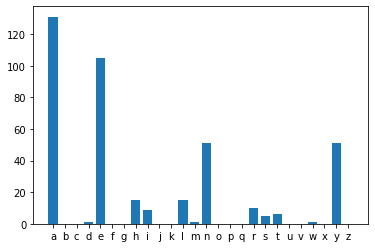

In [52]:
pl.bar(np.arange(26), counts, tick_label = [chr(x) for x in range(ord('a'), ord('z')+1)])
